#**Bankruptcy** **Prevention**


This is a classification project, since the variable to predicg is binary (bankruptcy or Non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from a different features.

The data file contains 7 features about 250 companies.

The data set includes the following variables:
1.   Industrial Risk: 0 = Low_risk , 0.5 = Medium_risk , 1 = High_risk.
2.   Management RIsk: 0 = Low_risk , 0.5 = Medium_risk , 1 = High_risk.
3. Financial Flexibility: 0 = Low flexibility , 0.5 = Medium flexibility , 1 = High flexibility.
4. Credibilty: Low credibility , 0.5 = Medium credibility , 1 = High credibility
5. Competitiveness: Low Competitiveness , 0.5 = Medium Competitiveness , 1 = High Competitiveness.
6. Operating Risk: Low_risk , 0.5 = Medium_risk , 1 = High_risk.
7. Class: Bankruptcy , Non-bankruptcy(Target variable).

# About the Dataset

It appears that you have provided a dataset consisting of various risk factors and their corresponding classifications as "bankruptcy" or "non-bankruptcy." Each risk factor has a numerical value assigned to it. Here is a breakdown of the variables in your dataset:

industrial_risk: A measure of the industrial risk associated with a company.

management_risk: A measure of the management risk associated with a company.

financial_flexibility: A measure of the financial flexibility of a company.

credibility: A measure of the credibility of a company.

competitiveness: A measure of the competitiveness of a company.

operating_risk: A measure of the operating risk associated with a company.

class: The classification of the company as "bankruptcy" or "non-bankruptcy."

Each row represents a company, and the values in each row represent the corresponding risk factor values and the classification of the company.

For example, the first row suggests that the company has a moderate industrial risk (0.5), high management risk (1), no financial flexibility (0), no credibility (0), no competitiveness (0), moderate operating risk (0.5), and it is classified as "bankruptcy."

Similarly, each subsequent row represents a different company with its corresponding risk factor values and classification. It seems like you may have a dataset related to predicting bankruptcy or financial distress of companies based on these risk factors. If you have any specific questions or need further assistance, please let me know!

Outlining the steps we'll follow:

1. Load the dataset and perform necessary data preprocessing.
2. Handle missing values.
3. Encode categorical variables.
4. Split the data into training and testing sets.
5. Train a machine learning model on the training data.
6. Evaluate the model's performance on the testing data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving bankruptcy-prevention.csv to bankruptcy-prevention.csv


In [ ]:
bankrupt = pd.read_csv('bankruptcy-prevention.csv', sep = ';', header = 0)
bankrupt


#from os import sep
#import io
#bankrupt = pd.read_csv(io.BytesIO(uploaded['bankruptcy-prevention.csv']), sep=';',header=0)
#bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(bankrupt.info())
print(bankrupt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
(250, 7)


**Checking is there any missing value are there in data or not**

In [ ]:
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

There are no Null values in the dataset

In [ ]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


#**Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1**

In [ ]:
# Changing Non-Bankruptcy as 0 & Bankruptcy as 1
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [ ]:
print(bankrupt.columns)

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')


In [ ]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

KeyError: ignored

#**Exploratory Data Analysis (EDA)**

In [ ]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

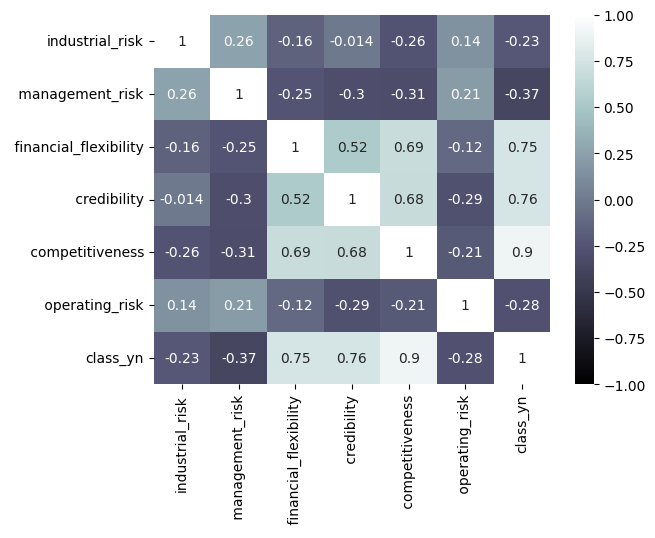

In [ ]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'bone')

<Axes: xlabel='class_yn', ylabel='count'>

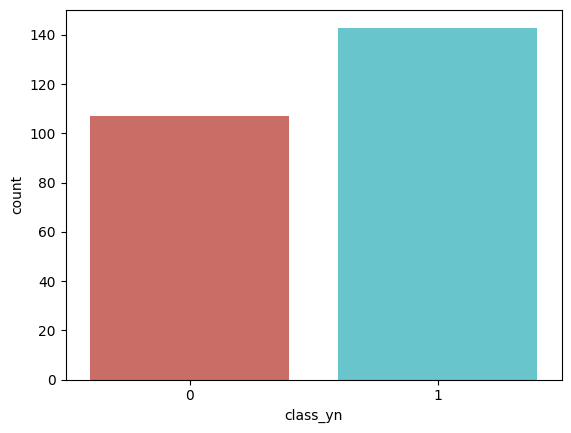

In [ ]:
sns.countplot(x = 'class_yn', data = bankrupt_new, palette = 'hls')

<Axes: xlabel=' financial_flexibility', ylabel='count'>

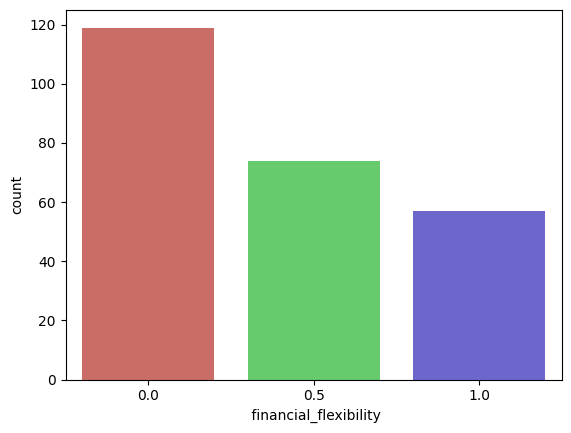

In [ ]:
sns.countplot(x = ' financial_flexibility', data = bankrupt_new, palette = 'hls')

<Axes: xlabel='class_yn'>

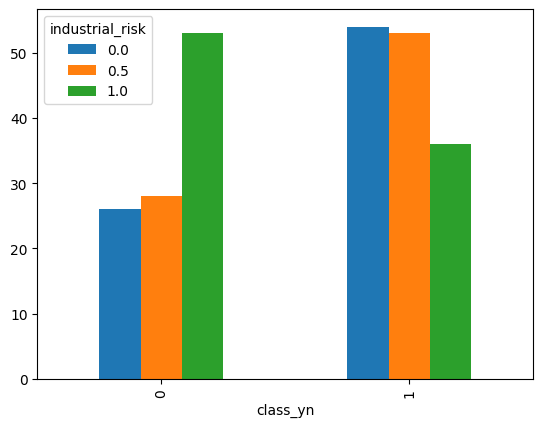

In [ ]:
# For Visualization
pd.crosstab(bankrupt.class_yn, bankrupt.industrial_risk).plot(kind='bar')

In [ ]:
bankrupt_new.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

<Axes: xlabel=' financial_flexibility'>

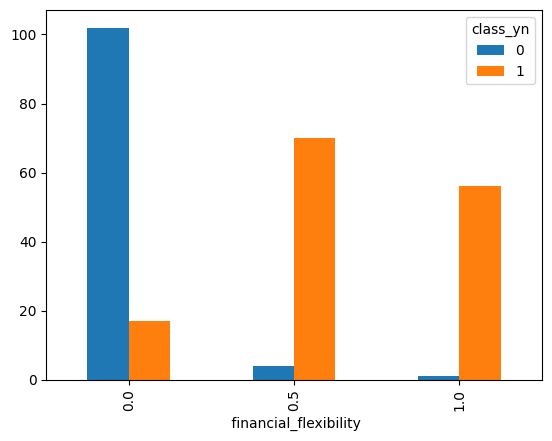

In [ ]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_yn']).plot(kind = 'bar')

<Axes: xlabel=' credibility'>

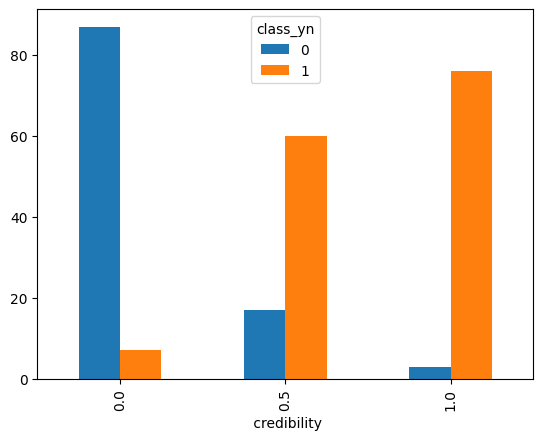

In [ ]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new.class_yn).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

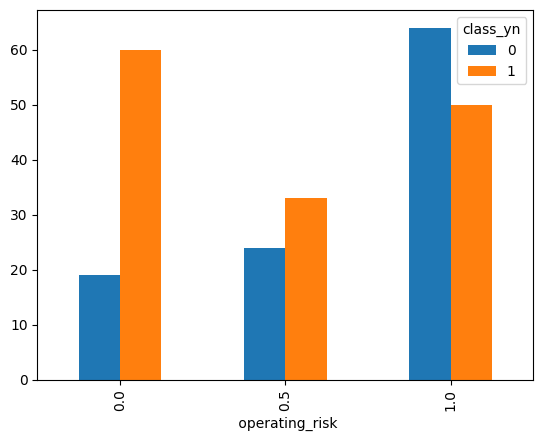

In [ ]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

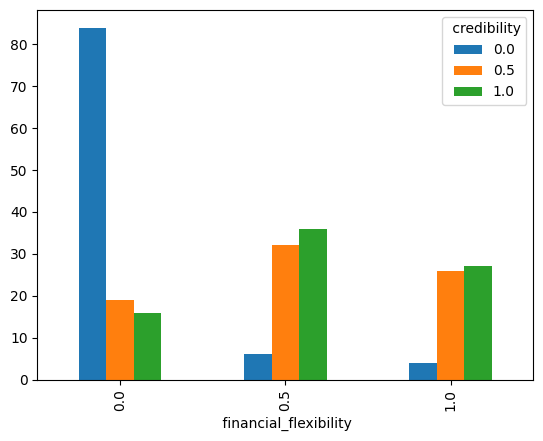

In [ ]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new[' credibility']).plot(kind = 'bar')

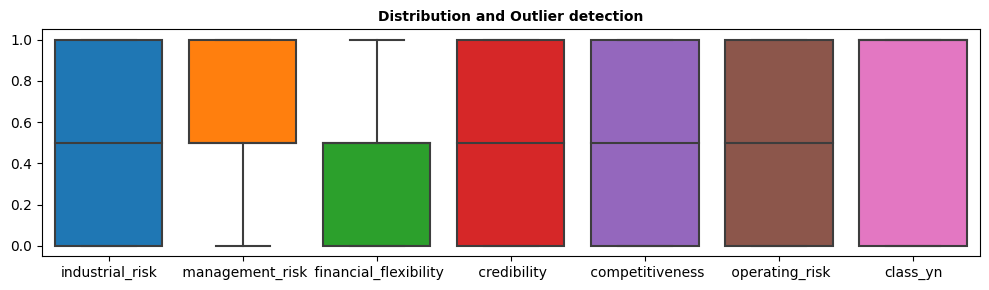

In [ ]:
plt.rcParams['figure.figsize'] = (10,3)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.title('Distribution and Outlier detection' , fontsize = 10 , fontweight = 'bold')
sns.boxplot(data = bankrupt , saturation = 1.0)
plt.tight_layout()

In [ ]:
np.shape(bankrupt_new)

(250, 7)

# Conclusion ➡


*   In data set there are 57.02% values are duplicated.
*   Data set is uniform because the complete data is ranges between 0-1 so there are no outlier present.
*   In data the column competitveness, credebility, financial_flexibilty has strong positive correlation or too much impact on class.
*   Whenever the risk is high the bankruptcy is low and whenever the risk is low the bankruptcy is high.


In [ ]:
# Input
x = bankrupt_new.iloc[:,:-1]

# Target Variable

y = bankrupt_new.iloc[:,-1]

# **Preparing Model**

**1. Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split # Train & Test
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datsets import make_classification

ModuleNotFoundError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticlassifier = LogisticRegression()

In [ ]:
logisticlassifier.fit(x_train, y_train)
logisticlassifier.coef_ # Coefficient of Features

array([[-0.43044914, -0.73309162,  2.37729553,  2.31022854,  3.68601327,
        -0.53101906]])


**After training the model then we have to predict on test data**

In [ ]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

Let's test the performance of our Model - Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist


array([[26,  0],
       [ 0, 37]])

**Accuracy of a Model**

In [ ]:
# Train Accuracy

train_acc_logist = np.mean(logisticlassifier.predict(x_train)==y_train)
train_acc_logist

0.9946524064171123

In [ ]:

# Test Accuracy

test_acc_logist = np.mean(logisticlassifier.predict(x_test)==y_test)
test_acc_logist

1.0

In [ ]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

Accuracy of Overall Model

In [ ]:

logisticlassifier.fit(x,y)
logisticlassifier.coef_ #Coefficient of features

array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [ ]:
y_pred = logisticlassifier.predict(x)
confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[106,   1],
       [  0, 143]])

In [ ]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [ ]:
logisticlassifier.score(x_test, y_test)

1.0

In [ ]:
logisticlassifier.score(x_train, y_train)

0.9946524064171123

### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularization method
#### here we have L1, L2 regularization
##### It turns out they have different but equally useful properties.
##### From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly.
#####L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.
#### L1 = lasso regularization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
clf1 = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)
print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred)) # format float output

Test Accuracy: 0.984


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform (x_test)

In [ ]:
# create a pipeline
pipe1 = Pipeline([('scaler', StandardScaler()),
                 ('tree', DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1))])
pipe1

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(max_depth=3, random_state=1))])

In [ ]:
# fit the estimator on training data
pipe1.fit(x_train, y_train)
# pipeline.score(X_test, y_test):  apply transforms, and score with the final estimator
print('Test Accuracy: %.3f' % pipe1.score(x_test, y_test))

Test Accuracy: 0.984


In [ ]:
pipe2 = Pipeline([('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier(random_state=1))])
# set parameters of the estimators in a pipeline
param_grid = [{'clf__criterion':['gini','entropy'], 'clf__max_depth':list(range(1,16))}]
# Apply GridSearch on the pipeline
gs = GridSearchCV(pipe2, param_grid=param_grid)
pipe2

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=1))])

In [ ]:
gs.fit(x_train, y_train)
print(gs.best_params_)
#set the clf to the best combination of parameters
clf_best = gs.best_estimator_
# Fit the best model to the data.
clf_best = clf_best.fit(x_train, y_train)
# Print the accuracy
y_pred = clf_best.predict(x_test)
print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))

{'clf__criterion': 'gini', 'clf__max_depth': 3}
Test Accuracy: 0.984


# Benefits of Using Pipeline
Convenience and encapsulation: one call which fit and predict to execute a whole sequence of transformers and estimators on the same data.
Joint parameter selection: grid search over parameters of all estimators in the pipeline at once.
Safety: avoid leaking statistics from test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors

#Using Lazypredict to check the accuracy of different algorithms on the data.

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.4
    Uninstalling Flask-2.2.4:
      Successfully uninstalled Flask-2.2.4


In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output #Load Data

In [ ]:
df = px.data.tips() #Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id = 'colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value':c}
                for c in px.colors.named_colorscales()
            ])
    ]),
]) # Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
  return px.scatter(
      df, x="total_bill" , y="tip", color = "size",
      color_continuous_scale=colorscale,
      render_mode="webg1" , title = "Tips"
  )#Run app and display result inline in the notebook

In [ ]:
app.run_server(mode='external')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



Dash app running on:


<IPython.core.display.Javascript object>